In [1]:
import mne
import numpy as np
import matplotlib
from mne.preprocessing import ICA 

In [2]:
#subjects = ['P01','P04','P05','P06','P07','P09','P10','P11','P12','P13','P14']
#rawlist = [mne.io.read_raw_fif('%s-raw.fif' % sub) for sub in subjects]
sub = 'P01'
raw = mne.io.read_raw_fif('%s-raw.fif' % sub)

Opening raw data file P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.


In [3]:
print(raw.info['ch_names'])

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'STI 014']


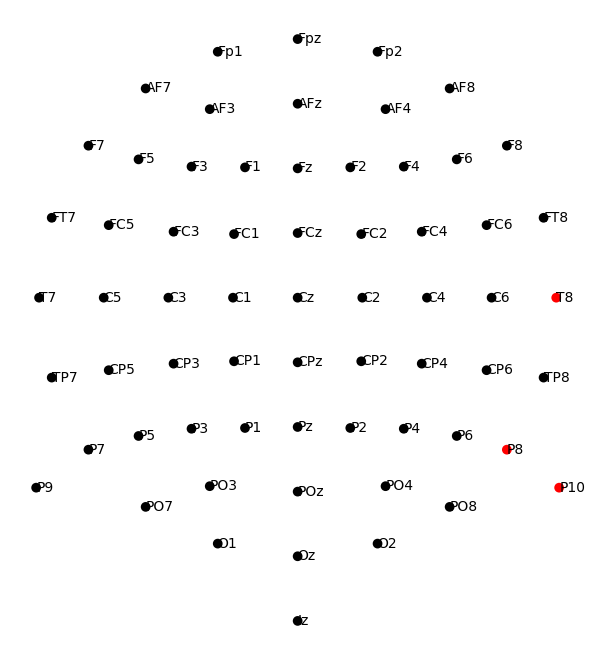

In [4]:
raw.plot_sensors(kind='topomap', show_names=True, to_sphere=True);

In [5]:
#raw.plot();
raw_cop = raw.copy()


Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 70 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-12 dB cutoff frequency: 78.75 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.3s finished


Using matplotlib as 2D backend.


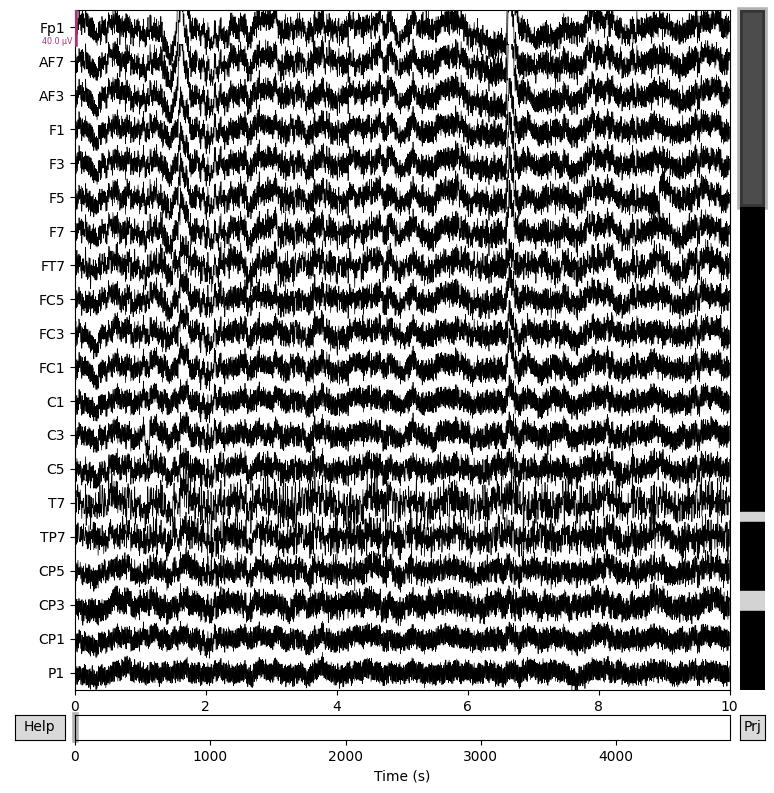

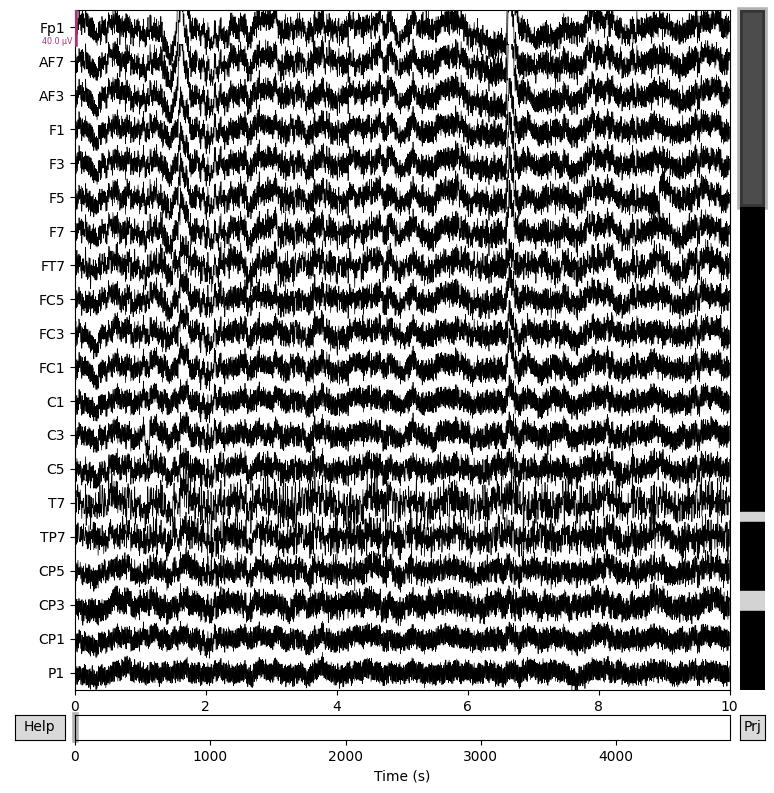

In [6]:
freq_low = 1
freq_high = 70

#filter data with a mne filter with forward - backward filtering resulting in zero phase shift.
raw_cop =  raw.copy().load_data().filter(l_freq = freq_low, h_freq = freq_high, phase='zero-double')

raw_cop.plot()

Using EOG channels: EXG1, EXG2, EXG3, EXG4
EOG channel index for this subject is: [64 65 66 67]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 1579 significant peaks
Number of EOG events detected: 1579


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


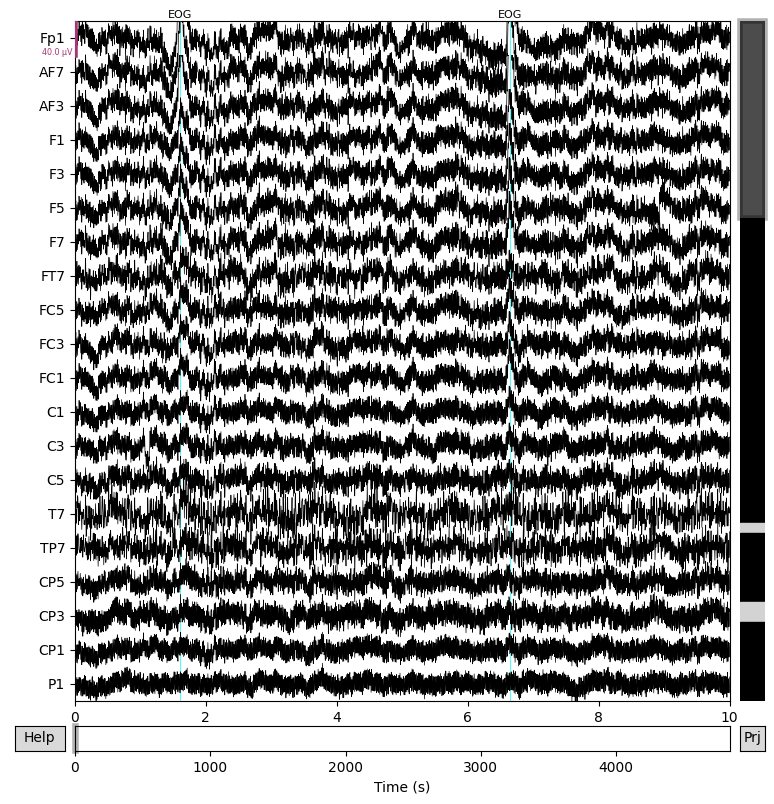

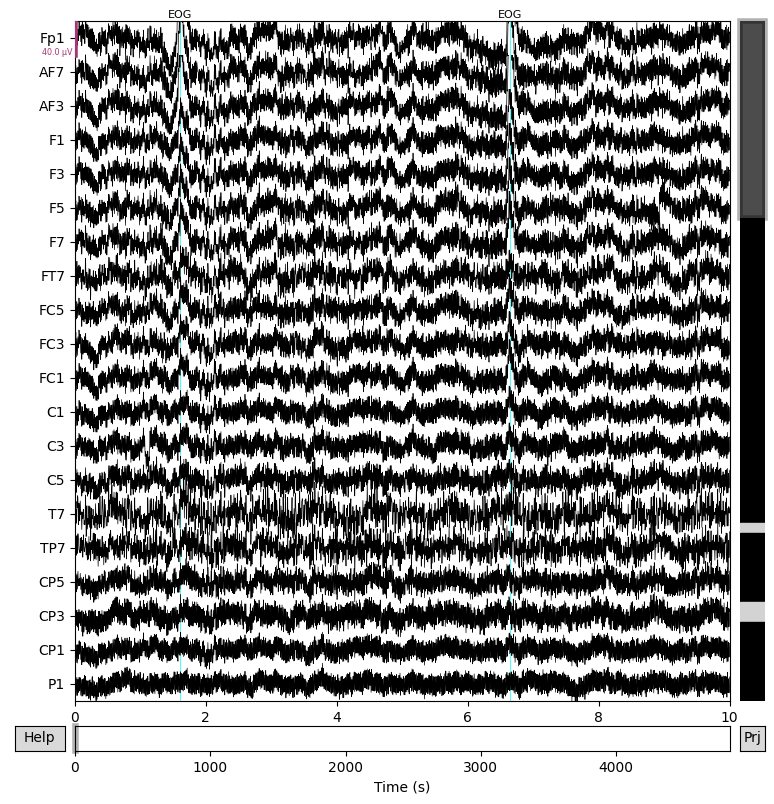

In [7]:
eog_events = mne.preprocessing.find_eog_events(raw_cop) 
#eog_events = mne.preprocessing.find_eog_events(raw, event_id=998)
raw_cop.plot(events=eog_events, event_id={'EOG': 998})


In [8]:
ica = ICA(n_components=15, max_iter='auto', random_state=97)
ica.fit(raw_cop)
eog_indices, eog_scores = ica.find_bads_eog(raw_cop)
ica.exclude = eog_indices

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 38.7s.
Using EOG channels: EXG1, EXG2, EXG3, EXG4
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [9]:
raw_ica = ica.apply(raw.copy().load_data())

freq_low = 1
freq_high = 70

#filter data with a mne filter with forward - backward filtering resulting in zero phase shift.
raw_filt =  raw_ica.copy().load_data().filter(l_freq = freq_low, h_freq = freq_high, phase='zero-double')


Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 70 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-12 dB cutoff frequency: 78.75 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.3s finished


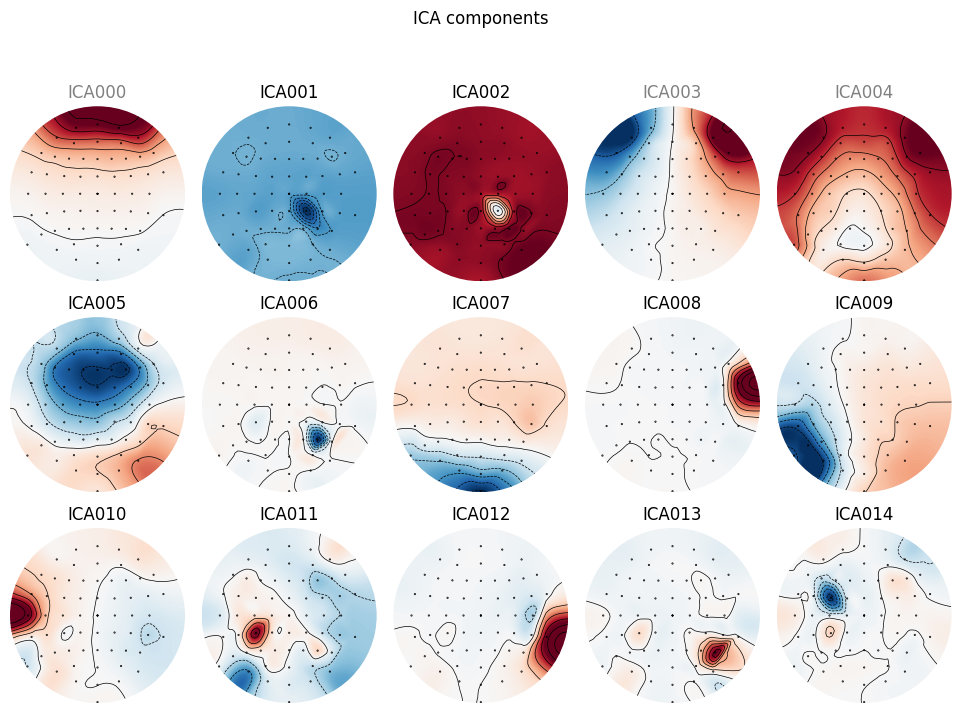

In [10]:
ica.plot_components();

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.


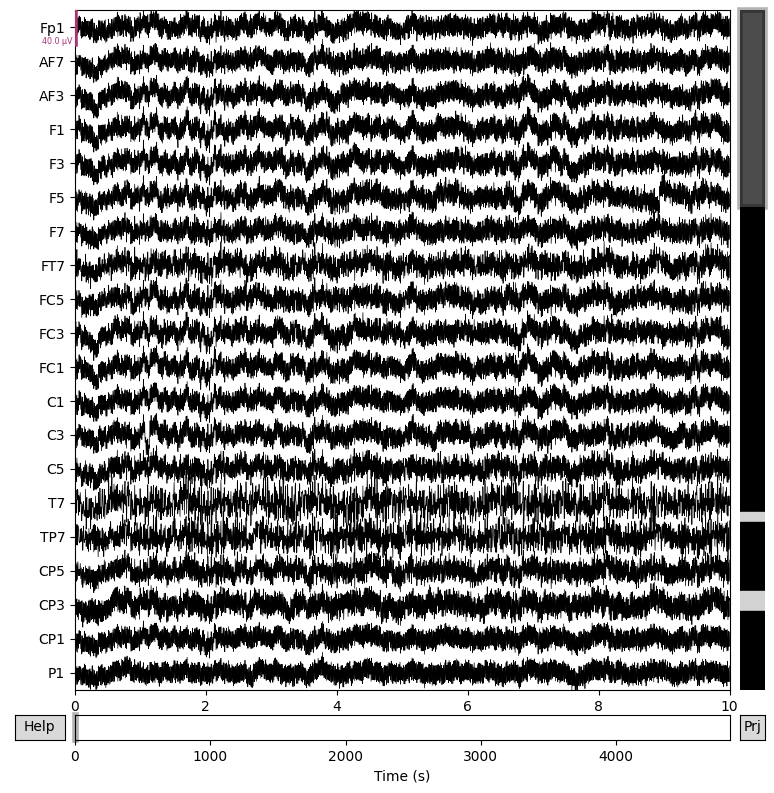

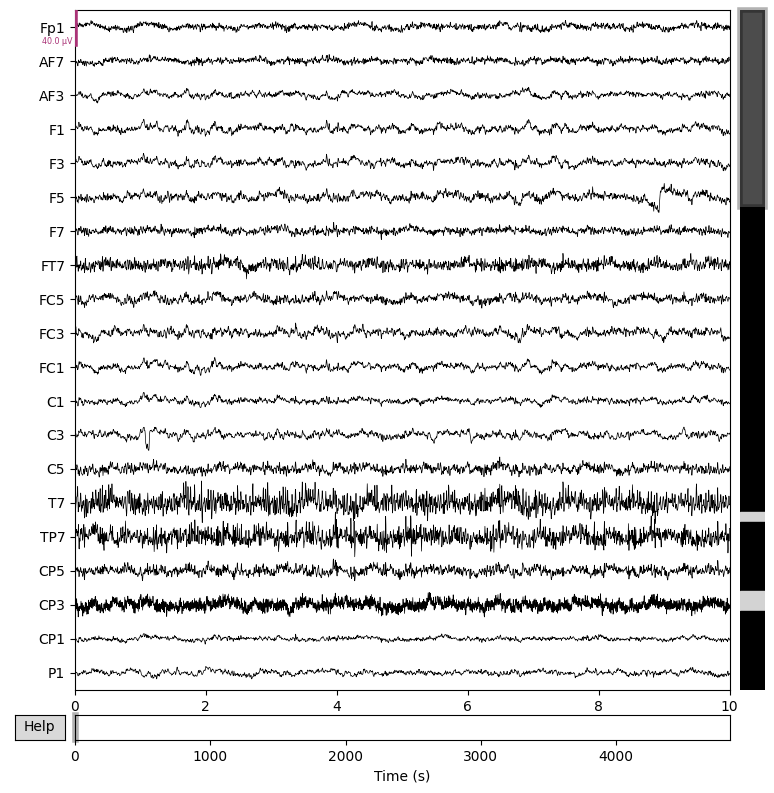

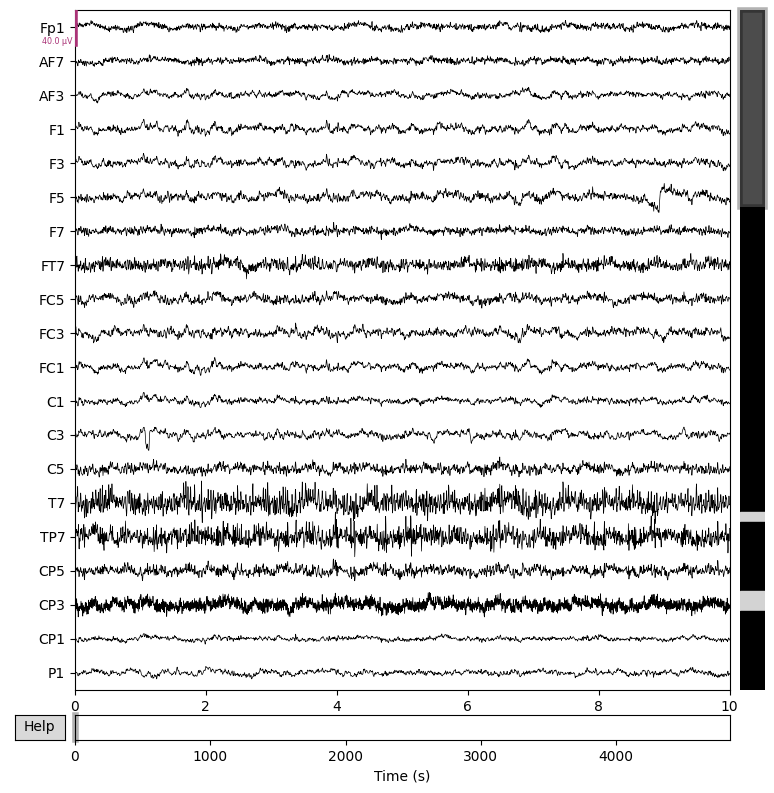

In [11]:
data_avg = raw_filt.copy().load_data().set_eeg_reference(ref_channels='average')
raw_filt.plot()
data_avg.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.2s finished


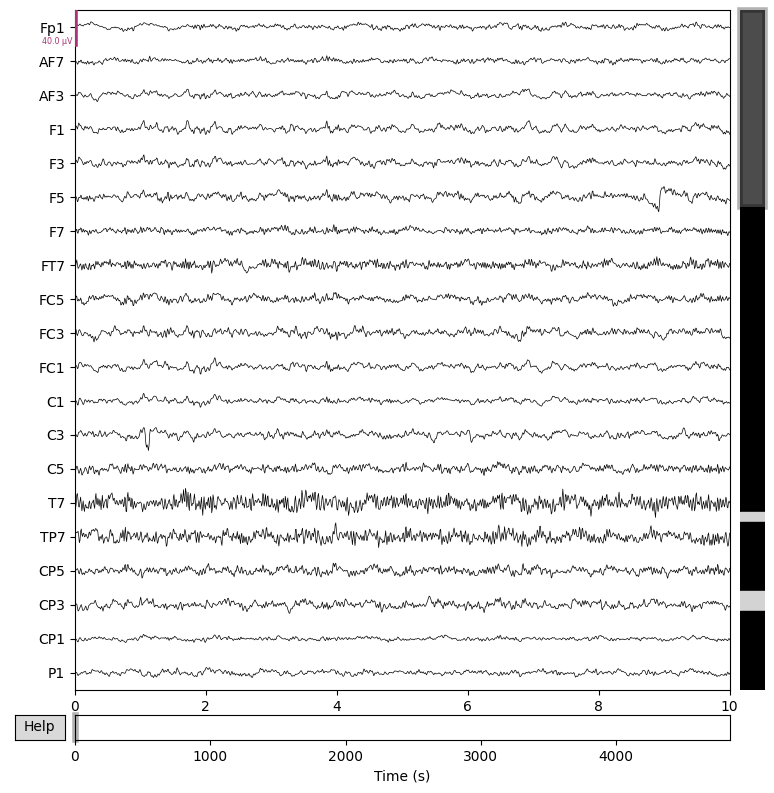

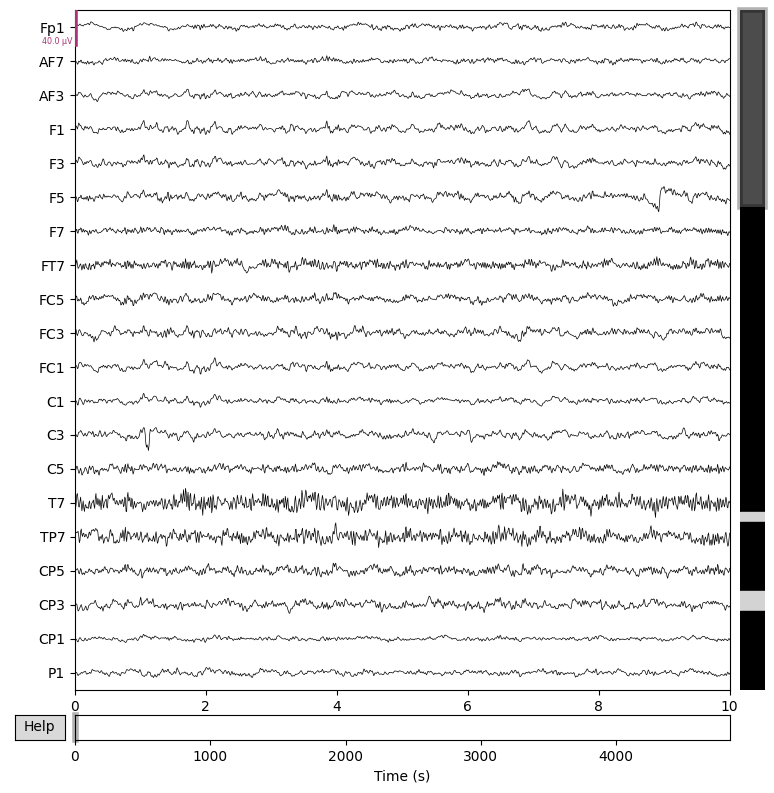

In [12]:
freq_low = 1
freq_high = 30

#filter data with a mne filter with forward - backward filtering resulting in zero phase shift.
raw_filt20 =  data_avg.copy().load_data().filter(l_freq = freq_low, h_freq = freq_high, phase='zero-double')
raw_filt20.plot()

In [13]:
event_ma, ids = mne.events_from_annotations(raw)
ids
print(raw.info['ch_names'])
event_ma = mne.find_events(raw, stim_channel='STI 014')
epochs = mne.Epochs(raw_filt, events=event_ma, 
                    event_id=[11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44, 111, 112,
                              113, 114, 121, 122, 123, 124, 131, 132, 133, 134, 141, 142, 143, 144], tmin=-0.1, tmax=3.0)

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'STI 014']
540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
1 projection items activated


In [14]:
ones = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]


def get_events(epoch_obj):
    y = epoch_obj.events[:, 2]
    Y = [1 if x in ones else 2 for x in y]
    return Y

def get_datas(epoch_obj):
    x = epoch_obj.get_data()
    return x

Y = get_events(epochs)
data = get_datas(epochs)

#Y = [1 if x in ones else 2 for x in evts]

print(Y)

epoch_list = [epochs]

Using data from preloaded Raw for 160 events and 1588 original time points ...
0 bad epochs dropped
[2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2]


In [15]:
# ---------------------------------------------------------------------------
# ---- Step 9: Building a machine learning pipeline to classify all data ----
# ---------------------------------------------------------------------------

# import needed packages
from sklearn.model_selection import train_test_split
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [16]:
X = get_datas(epochs)
y = get_events(epochs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Using data from preloaded Raw for 160 events and 1588 original time points ...


## LogisticRegression

In [17]:
# ---------------------------------------------------------------------------
# ---- Step 9: Building a machine learning pipeline to classify all data ----
# ---------------------------------------------------------------------------

#### logistic regression gridsearch

from sklearn.linear_model import LogisticRegression

params={'model__C':[.01, .05, .1, .5, 1, 5, 10],
           'model__penalty':['l1', 'l2', 'elasticnet']}

pipeline = Pipeline([
    ('CSP', CSP(n_components=20)),
    ('scaler', StandardScaler()),
    ('model',LogisticRegression())])

grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params, scoring='accuracy')

#### best vals: C = 0.1, penalty l2, mean score = 0.492

In [19]:
# grid.fit(X_train, y_train)

C:\Users\e.dueker\JupyterProjects\neuroinformatics\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\e.dueker\JupyterProjects\neuroinformatics\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\e.dueker\JupyterProjects\neuroinformatics\env\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\e.dueker\JupyterProjects\neuroinformatics\env\lib\s

Computing rank from data with rank=None
    Using tolerance 1.6e+02 (2.2e-16 eps * 69 dim * 1e+16  max singular value)
    Estimated rank (mag): 66
    MAG: rank 66 computed from 69 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 69 -> 66
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e+02 (2.2e-16 eps * 69 dim * 9.8e+15  max singular value)
    Estimated rank (mag): 66
    MAG: rank 66 computed from 69 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 69 -> 66
Estimating covariance using EMPIRICAL
Done.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CSP',
                                        CSP({'component_order': 'mutual_info',
 'cov_est': 'concat',
 'cov_method_params': None,
 'log': None,
 'n_components': 20,
 'norm_trace': False,
 'rank': None,
 'reg': None,
 'transform_into': 'average_power'})),
                                       ('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [20]:
import pandas as pd
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1        6.000063      0.286623         0.033194        0.010154   
7        6.277148      0.295032         0.038652        0.007580   
4        6.051167      0.275860         0.048334        0.012966   
19       6.167702      0.202388         0.046967        0.011647   
13       6.239639      0.170688         0.048708        0.012595   

   param_model__C param_model__penalty  \
1            0.01                   l2   
7             0.1                   l2   
4            0.05                   l2   
19             10                   l2   
13              1                   l2   

                                        params  split0_test_score  \
1   {'model__C': 0.01, 'model__penalty': 'l2'}           0.500000   
7    {'model__C': 0.1, 'model__penalty': 'l2'}           0.500000   
4   {'model__C': 0.05, 'model__penalty': 'l2'}           0.500000   
19    {'model__C': 10, 'model__penalty': 'l2'}           0.576923   
13     {'model__C': 1, 'model__penalty': 'l2'}           0.500000   

    split1_test_score  split2_test_score  split3_test_score  \
1            0.615385           0.538462               0.52   
7            0.615385           0.461538               0.52   
4            0.615385           0.500000               0.48   
19           0.538462           0.500000               0.44   
13           0.576923           0.461538               0.48   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
1                0.52         0.538769        0.040194                1  
7                0.56         0.531385        0.052665                2  
4                0.52         0.523077        0.047856                3  
19               0.52         0.515077        0.045299                4  
13               0.52         0.507692        0.039751                5

## LinearDiscriminantAnalysis

In [ ]:
# ---------------------------------------------------------------------------
# ---- Step 9: Building a machine learning pipeline to classify all data ----
# ---------------------------------------------------------------------------

#### lda gridsearch

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

params={'CSP__n_components':[5, 10, 20, 30, 40],
        'model__solver':['svd', 'lsqr', 'eigen']}

pipeline = Pipeline([
    ('CSP', CSP()),
    ('scaler', StandardScaler()),
    ('model', LinearDiscriminantAnalysis())])

grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params, scoring='accuracy')

#### best vals: n_components = 40/20, solver = svd, mean score = 0.538462

In [ ]:
# grid.fit(X_train, y_train)

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

## SVC

In [ ]:
# ---------------------------------------------------------------------------
# ---- Step 9: Building a machine learning pipeline to classify all data ----
# ---------------------------------------------------------------------------

#### svc gridsearch

from sklearn.svm import SVC

params={'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__C': [.01, .05, .1, .5, 1, 5, 10],
       'model__gamma': [.01, .05, .1, .5, 1, 5, 10]}

pipeline = Pipeline([
    ('CSP', CSP(n_components = 20)),
    ('scaler', StandardScaler()),
    ('model', SVC())])

grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params, scoring='accuracy')

#### best vals: kernel = rbf, gamma = 0.5, c = 10, mean score = 0.539077

In [ ]:
# grid.fit(X_train, y_train) # be careful takes very very long

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

## QuadraticDiscriminantAnalysis

In [ ]:
# ---------------------------------------------------------------------------
# ---- Step 9: Building a machine learning pipeline to classify all data ----
# ---------------------------------------------------------------------------

#### QuadraticDiscriminantAnalysis gridsearch

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

params={'model__reg_param': [.01, .05, .1, .5, 1, 5, 10]}

pipeline = Pipeline([
    ('CSP', CSP(n_components = 20)),
    ('scaler', StandardScaler()),
    ('model', QuadraticDiscriminantAnalysis())])

grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params, scoring='accuracy')

#### best vals: reg_param = 1, mean score = 0.483692

In [ ]:
# grid.fit(X_train, y_train)

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

## RandomForestClassifier

In [ ]:
# ---------------------------------------------------------------------------
# ---- Step 9: Building a machine learning pipeline to classify all data ----
# ---------------------------------------------------------------------------

#### RandomForestClassifier gridsearch

from sklearn.ensemble import RandomForestClassifier

params={'model__n_estimators': [10, 100, 500, 1000],
       'model__max_features': [1, None, 0.3]}

pipeline = Pipeline([
    ('CSP', CSP(n_components = 20)),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(max_depth=None, min_samples_split=2))])

grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params, scoring='accuracy')

#### best vals: max_features = 0.3, n_estimators = 10, mean score = 0.537538

In [ ]:
# grid.fit(X_train, y_train)

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

## KNeighborsClassifier

In [ ]:
# ---------------------------------------------------------------------------
# ---- Step 9: Building a machine learning pipeline to classify all data ----
# ---------------------------------------------------------------------------

#### KNeighborsClassifier gridsearch

from sklearn.neighbors import KNeighborsClassifier

params={'model__n_neighbors': [3, 5, 10],
       'model__weights': ['uniform', 'distance'],
       'model__p': [1, 2, 3],
       'model__leaf_size': [10, 30, 50]}
        

pipeline = Pipeline([
    ('CSP', CSP(n_components = 20)),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())])

grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params, scoring='accuracy')

#### best vals: mean score = 0.523077

In [ ]:
# grid.fit(X_train, y_train)

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

## Neural Network

In [ ]:
X_train.shape

In [ ]:
# ---------------------------------------------------------------------------
# ---- Step 9: Building a machine learning pipeline to classify all data ----
# ---------------------------------------------------------------------------

#### NN

import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(69, 1588)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, np.array(y_train), epochs=10, batch_size=32)

## Stats

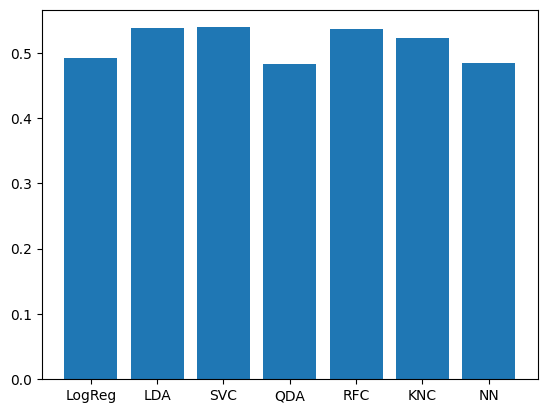

In [21]:
acc = {}
acc['LogReg'] = 0.492
acc['LDA'] = 0.538
acc['SVC'] = 0.539
acc['QDA'] = 0.483
acc['RFC'] = 0.537
acc['KNC'] = 0.523
acc['NN'] = 0.484

import matplotlib.pyplot as plt

plt.bar(acc.keys(), acc.values())
plt.show()